<a href="https://colab.research.google.com/github/Timecapp/XAI_Capstone/blob/main/4thbrain_WBC_BASELINE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

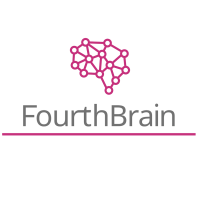
# FOURTHBRAIN MLE 10
> SAMSUNG INDUSTRY CAPSTONE PROJECT


# HISTOPATHOLOGICAL BREAST CANCER DETECTION & EXPLAINABILITY

> TEAM: **DR. SHAISTA HUSSAIN & MR. PEDRAM EMAMI**

> *NB: WISCONSIN DATASET*

# INTRODUCTION

Histopathological images are the gold standard in detecting breast cancers. A biopsy is a surgically removed section of tissue from a region of concern of disease. This tissue is processed with dyes and Hematoxylin and Eosin (H&E) stains; where Hematoxylin stains the nuclei dark blue/purple and Eosin stains other cellular components pink/red and orange. The tissue is cut and frozen into a section on a slide, which is then examined under a microscope. The staining enables a pathologist to visualize the tissue structure and differentiate between healthy and diseased (benign or malignant) tissue.

Early identification of breast cancer is important and is achieved by screening detection methods.  Time is the crucial factor where early identification of malignant cells enables more favourable interventional prognosis; whereas late detection subjects patients to more complex therapeutics and lower survival rates (Salod & Singh, 2020).  Explainable Artificial Intelligence (XAI) is an emerging domain aimed at designing intelligent systems that are capable of explaining their recommendations to a human being (Lamy et al., 2019).


# BUSINESS PROBLEM

Manual analysis of large breast cancer histopathology datasets is not practical;as it is extensively time-consuming and leaves a gap for subjective pathologist interpretations.  While Machine Learning has produced successful results for classifying digital Whole Slide Images as normal, benign or malignant; the explainability, or specific justifications, for how the algorithm reaches its decision with accuracy, is clouded in Neural Networks black-boxes which limit both transparency and accountability.

The aim of this Capstone has been to generate an interpretable machine learning algorithm tool to augment the current understanding the underlying mechanisms involved in arriving at a decision from the data.  This work employs Linear Regression and Random Forest for data exploration and model prediction; Radviz were used as visualization technique for feature selection; and, a Decision Tree algorithm was used to create a model that are able to differentiate between Malignant and Benign breast tumors from breast mass images. These models can be considered white-box models which means their inner workings are easier to explain and interpret; moreover, SHAP was applied for explainability (xAI). 


# DATA
**SOURCE**
* The Wisconsin-Breast Cancer (Diagnostics) dataset (WBC) was downloaded from the UCI machine learning repository.
* It is a classification dataset, which records the measurements for breast cancer cases. 
* There are two classes, benign and malignant. 
* The malignant class of this dataset is downsampled to 21 points, which are considered as outliers, while points in the benign class are considered inliers.
* The dataset was created by Dr. William H. Wolberg, at the University Of Wisconsin Hospital at Madison, Wisconsin,USA. 
* Dr. Wolberg used fine needle aspirates from patients with solid breast masses and digitally analysed cytological features. 
* The program uses a curve-fitting algorithm, to compute ten features from each one of the cells in the sample, than it calculates the mean value, extreme value and standard error of each feature for the image, returning a 30 real-valuated vector.


**DISTRIBUTION**
* Train 70%
* Test 30%

**FORMAT**
* Attribute Information:

1) ID number
2) Diagnosis (M = malignant, B = benign)
3-32)

* 10 Features computed for each cell nucleus:

a) radius (mean of distances from center to points on the perimeter)
b) texture (standard deviation of gray-scale values)
c) perimeter
d) area
e) smoothness (local variation in radius lengths)
f) compactness (perimeter^2 / area - 1.0)
g) concavity (severity of concave portions of the contour)
h) concave points (number of concave portions of the contour)
i) symmetry
j) fractal dimension ("coastline approximation" - 1)

# OBJECTIVES
**Research Goals**
>  produce a model that is capable of feature analysis to produce a diagnosis of normal/benign or malignant
> use accuracy metrics and LIME or SHAP or XGBoost to help with explainability (justification for diagnosis)
> compare diagnostic accuracy and explainability whole slide image analysis (in BreakHis notebook) to determine the more appropriate approach to healthcare xAI
 
**Research Questions**

> Can we use deep learning to detect malignancies with the same or higher accuracy and confidence as existing models?

> What are bias and errors in our model, and what are solutions to these?

# BASELINE
The proposed data was an annotated wholeslide image dataset of canine breast
cancer that was more relevant to the precursor study of translating animal histopathology into useful human pathological analysis (https://www.nature.com/articles/s41597-020-00756-z) (Aubreville et al., 2020).

We have opted to use the well known Wisconsin Breast Cancer (Diagnostic) dataset, and have compared existing models using this dataset for comparison.


**WBC Models & Baseline Comparison**
1.  CNN / Keras   https://www.kaggle.com/code/luckyapollo/predict-idc-in-breast-cancer-histology-images/edit 
2.  Huang, Y (2020). Wisconsin Dataset . https://towardsdatascience.com/explainable-deep-learning-in-breast-cancer-prediction-ae36c638d2a4 used LIME
- to explain the IDC image prediction results of a 2D ConvNet model in breast cancer diagnosis. 
- Explanations of model prediction of both IDC and non-IDC were provided by setting the number of super-pixels/features (i.e., the num_features parameter in the method get_image_and_mask()) to 20.
- observed that the explanation results are sensitive to the choice of the number of super pixels/features. 
- explanations via highlighted bounding boxes
- recommendations: 
- Domain knowledge to adjust parameters 
- Quality of the input data (pixels) 
- Accuracy can be improved by adding more samples.
3. Mooney, IDC Breast Cancer.  https://www.kaggle.com/code/paultimothymooney/predicting-idc-in-breast-cancer-histology-images/notebook 
- 76% accuracy
- recommendations: 
- Improve data visualization 
- Optimize data augmentation 
- Optimize NN architecture



# IMPORTING RESOURCES

In [ ]:
!pip install interpret

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

from skimage.io import imshow, imread

warnings.filterwarnings('ignore')

In [ ]:
import scipy.stats as stats
%matplotlib inline
from imblearn.over_sampling import SMOTE
from interpret.blackbox import LimeTabular,ShapKernel,PartialDependence,MorrisSensitivity

from interpret import show

from sklearn.model_selection import train_test_split,RepeatedKFold,cross_val_score,cross_val_predict
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report,plot_roc_curve,confusion_matrix,accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB


import warnings
warnings.filterwarnings("ignore")
pd.set_option('display.float_format', lambda x:'%.3f' % x)

sns.set_style('darkgrid')
sns.set(font_scale=1.3)

# Loading the Dataset

The Wisconsin WSI Breast Cancer dataset consists of 5,547 50x50 pixel RGB digital images of H&E-stained breast histopathology samples. These images are labeled as either IDC or non-IDC. There are 2,788 IDC images and 2,759 non-IDC images. Those images have already been transformed into Numpy arrays and stored in the X.npy file. Similarly the corresponding labels are stored in the Y.npy file in Numpy array format.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df=pd.read_csv('/content/drive/MyDrive/capstone/BCW_data.csv')
df.head(3)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.990,10.380,122.800,1001.000,0.118,0.278,0.300,0.147,...,17.330,184.600,2019.000,0.162,0.666,0.712,0.265,0.460,0.119,NaN
1,842517,M,20.570,17.770,132.900,1326.000,0.085,0.079,0.087,0.070,...,23.410,158.800,1956.000,0.124,0.187,0.242,0.186,0.275,0.089,NaN
2,84300903,M,19.690,21.250,130.000,1203.000,0.110,0.160,0.197,0.128,...,25.530,152.500,1709.000,0.144,0.424,0.450,0.243,0.361,0.088,NaN


# Exploring the Dataset

In [ ]:
print(df.shape)
df.head()

(569, 33)


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.990,10.380,122.800,1001.000,0.118,0.278,0.300,0.147,...,17.330,184.600,2019.000,0.162,0.666,0.712,0.265,0.460,0.119,NaN
1,842517,M,20.570,17.770,132.900,1326.000,0.085,0.079,0.087,0.070,...,23.410,158.800,1956.000,0.124,0.187,0.242,0.186,0.275,0.089,NaN
2,84300903,M,19.690,21.250,130.000,1203.000,0.110,0.160,0.197,0.128,...,25.530,152.500,1709.000,0.144,0.424,0.450,0.243,0.361,0.088,NaN
3,84348301,M,11.420,20.380,77.580,386.100,0.142,0.284,0.241,0.105,...,26.500,98.870,567.700,0.210,0.866,0.687,0.258,0.664,0.173,NaN
4,84358402,M,20.290,14.340,135.100,1297.000,0.100,0.133,0.198,0.104,...,16.670,152.200,1575.000,0.137,0.205,0.400,0.163,0.236,0.077,NaN


In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,569.000,30371831.432,125020585.612,8670.000,869218.000,906024.000,8813129.000,911320502.000
radius_mean,569.000,14.127,3.524,6.981,11.700,13.370,15.780,28.110
texture_mean,569.000,19.290,4.301,9.710,16.170,18.840,21.800,39.280
perimeter_mean,569.000,91.969,24.299,43.790,75.170,86.240,104.100,188.500
area_mean,569.000,654.889,351.914,143.500,420.300,551.100,782.700,2501.000
smoothness_mean,569.000,0.096,0.014,0.053,0.086,0.096,0.105,0.163
compactness_mean,569.000,0.104,0.053,0.019,0.065,0.093,0.130,0.345
concavity_mean,569.000,0.089,0.080,0.000,0.030,0.062,0.131,0.427
concave points_mean,569.000,0.049,0.039,0.000,0.020,0.034,0.074,0.201
symmetry_mean,569.000,0.181,0.027,0.106,0.162,0.179,0.196,0.304


**Checking for missing values**

In [ ]:
df.isna().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

**There are missing and unnecessary values in our dataset.  We will drop those now**


In [ ]:
df.drop(["id","Unnamed: 32"],axis=1,inplace=True)
df.isna().sum()


diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

**Plotting benign vs malignant**

AttributeError: ignored

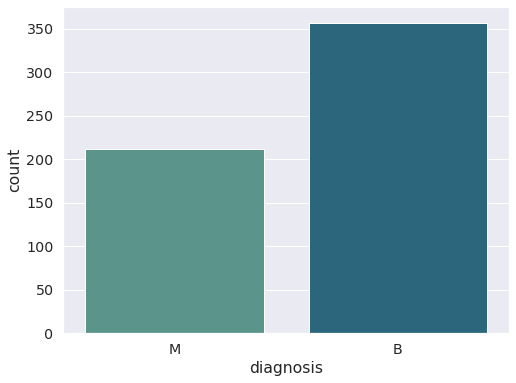

In [ ]:
plt.figure(figsize=(8, 6))
ax = sns.countplot(df.diagnosis, palette='crest')

for i in ax.containers:
    ax.bar_label(i, label_type='edge', padding=1)
ax.margins(y=0.1)

ax.set_title('M=1  B=0')

Text(0.5, 1.0, 'M=1  B=0')

In [ ]:
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.990,10.380,122.800,1001.000,0.118,0.278,0.300,0.147,0.242,...,25.380,17.330,184.600,2019.000,0.162,0.666,0.712,0.265,0.460,0.119
1,M,20.570,17.770,132.900,1326.000,0.085,0.079,0.087,0.070,0.181,...,24.990,23.410,158.800,1956.000,0.124,0.187,0.242,0.186,0.275,0.089
2,M,19.690,21.250,130.000,1203.000,0.110,0.160,0.197,0.128,0.207,...,23.570,25.530,152.500,1709.000,0.144,0.424,0.450,0.243,0.361,0.088
3,M,11.420,20.380,77.580,386.100,0.142,0.284,0.241,0.105,0.260,...,14.910,26.500,98.870,567.700,0.210,0.866,0.687,0.258,0.664,0.173
4,M,20.290,14.340,135.100,1297.000,0.100,0.133,0.198,0.104,0.181,...,22.540,16.670,152.200,1575.000,0.137,0.205,0.400,0.163,0.236,0.077


In [ ]:
# Give columns names in data 
col = df.columns       
print(col)

Index(['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')


**Extracting the target values from the dataframe and droping the columns (features) that won't be useful for our model**

Number of Benign:  357
Number of Malignant :  212


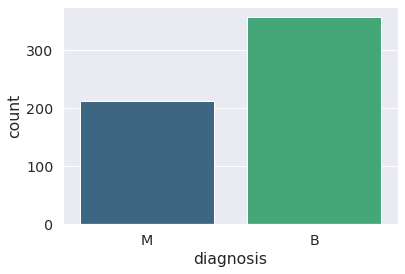

In [ ]:
n = df.diagnosis
B, M = n.value_counts()
ax = sns.countplot(n,label="Count",palette="viridis")
print('Number of Benign: ',B)
print('Number of Malignant : ',M)

In [ ]:
m = df.drop("diagnosis",axis=1)
m.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000,569.000,569.000,569.000,569.000,569.000,569.000,569.000,569.000,569.000,...,569.000,569.000,569.000,569.000,569.000,569.000,569.000,569.000,569.000,569.000
mean,14.127,19.290,91.969,654.889,0.096,0.104,0.089,0.049,0.181,0.063,...,16.269,25.677,107.261,880.583,0.132,0.254,0.272,0.115,0.290,0.084
std,3.524,4.301,24.299,351.914,0.014,0.053,0.080,0.039,0.027,0.007,...,4.833,6.146,33.603,569.357,0.023,0.157,0.209,0.066,0.062,0.018
min,6.981,9.710,43.790,143.500,0.053,0.019,0.000,0.000,0.106,0.050,...,7.930,12.020,50.410,185.200,0.071,0.027,0.000,0.000,0.157,0.055
25%,11.700,16.170,75.170,420.300,0.086,0.065,0.030,0.020,0.162,0.058,...,13.010,21.080,84.110,515.300,0.117,0.147,0.115,0.065,0.250,0.071
50%,13.370,18.840,86.240,551.100,0.096,0.093,0.062,0.034,0.179,0.062,...,14.970,25.410,97.660,686.500,0.131,0.212,0.227,0.100,0.282,0.080
75%,15.780,21.800,104.100,782.700,0.105,0.130,0.131,0.074,0.196,0.066,...,18.790,29.720,125.400,1084.000,0.146,0.339,0.383,0.161,0.318,0.092
max,28.110,39.280,188.500,2501.000,0.163,0.345,0.427,0.201,0.304,0.097,...,36.040,49.540,251.200,4254.000,0.223,1.058,1.252,0.291,0.664,0.207


**Creating a heatmap correlation of the subset of features of the new dataframe**

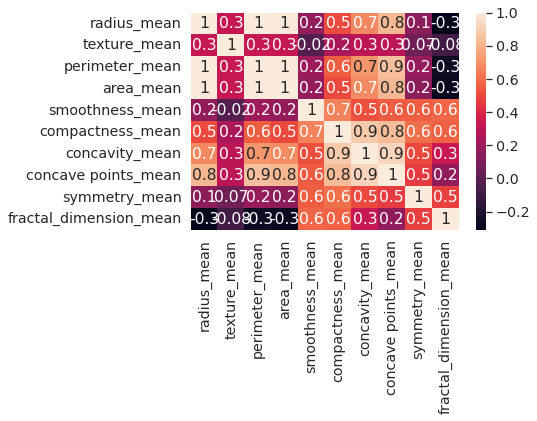

In [ ]:
sns.heatmap(df.iloc[:,1:11].corr(),annot=True,fmt='.1g');

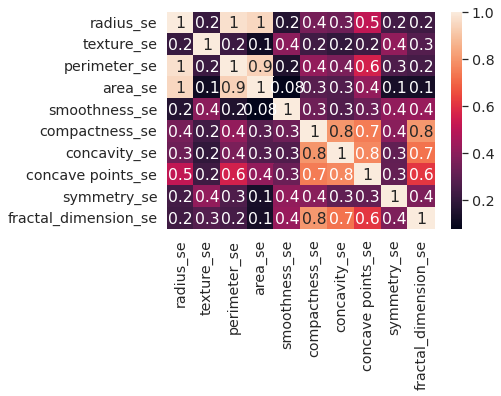

In [ ]:
sns.heatmap(df.iloc[:,11:21].corr(),annot=True,fmt='.1g');

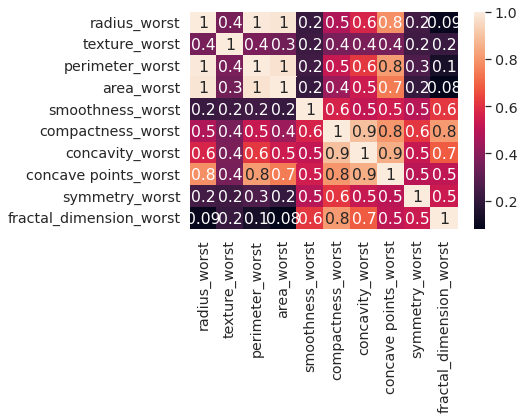

In [ ]:
sns.heatmap(df.iloc[:,21:].corr(),annot=True,fmt='.1g');

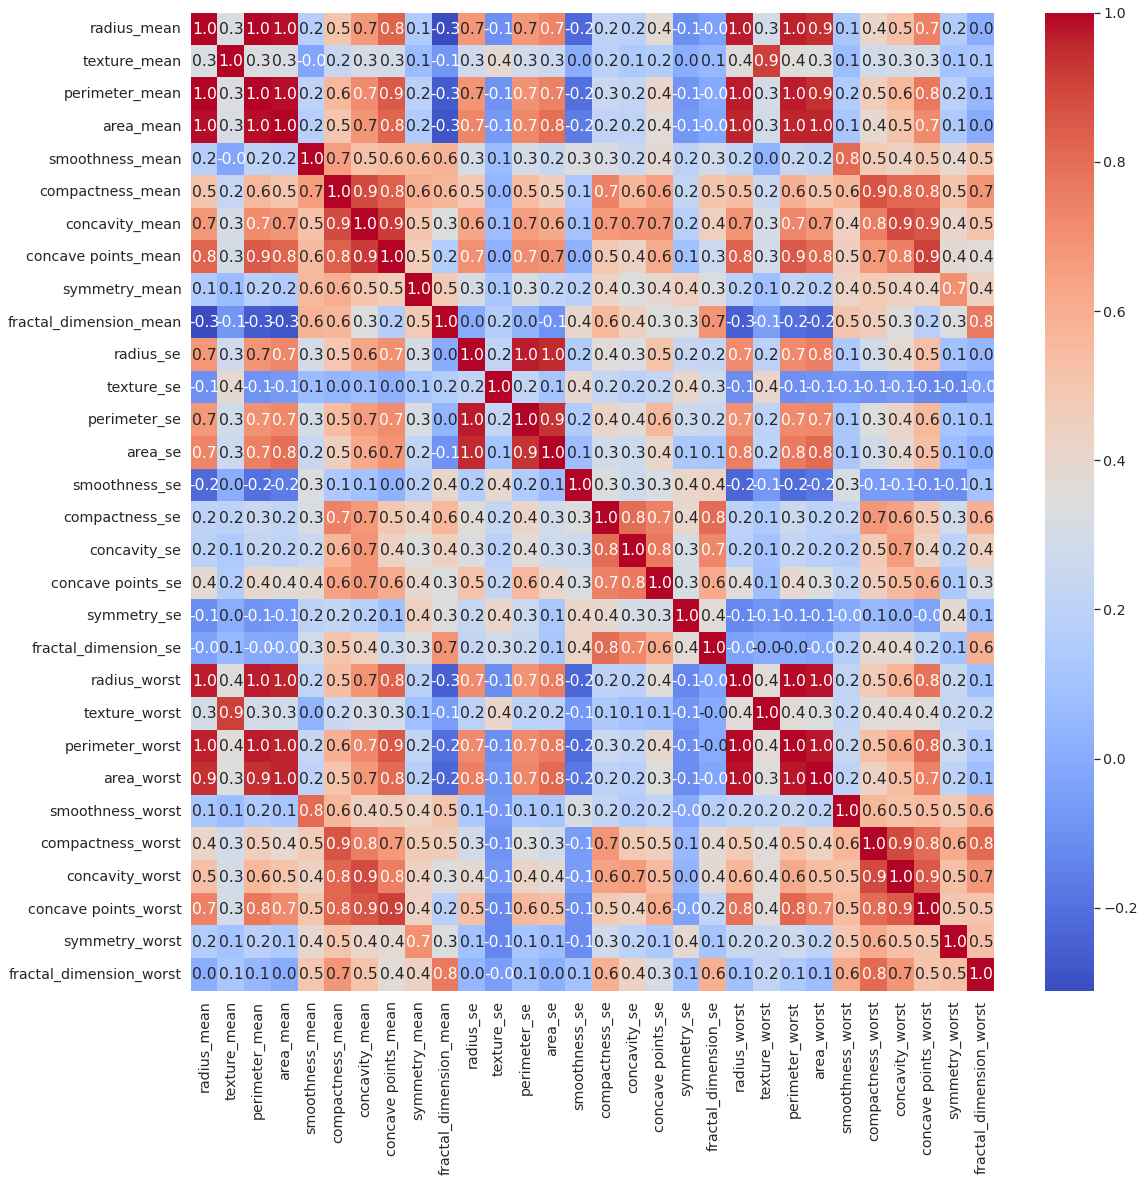

In [ ]:
plt.figure(figsize=(18,18))

corr = df.corr()
sns.heatmap(corr, cmap='coolwarm', annot = True, fmt='.1f')

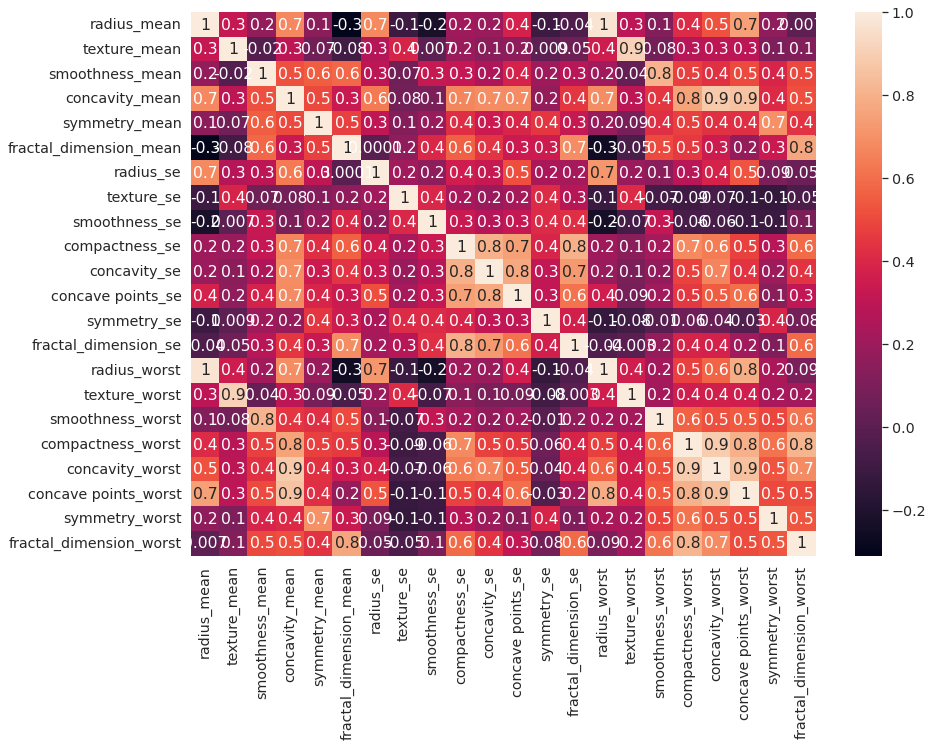

In [ ]:
df.drop(columns=['perimeter_mean','area_mean','compactness_mean','concave points_mean',
                      'perimeter_se','area_se',
                      'perimeter_worst','area_worst'],
                       inplace=True)
plt.figure(figsize=(14,10))
sns.heatmap(df.iloc[:,1:].corr(), annot=True, fmt='.1g');

In [ ]:
#convert our diagnostic values to numerical values 
df.diagnosis = [1 if each == "M" else 0 for each in df.diagnosis]
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.990,10.380,122.800,1001.000,0.118,0.278,0.300,0.147,0.242,...,25.380,17.330,184.600,2019.000,0.162,0.666,0.712,0.265,0.460,0.119
1,1,20.570,17.770,132.900,1326.000,0.085,0.079,0.087,0.070,0.181,...,24.990,23.410,158.800,1956.000,0.124,0.187,0.242,0.186,0.275,0.089
2,1,19.690,21.250,130.000,1203.000,0.110,0.160,0.197,0.128,0.207,...,23.570,25.530,152.500,1709.000,0.144,0.424,0.450,0.243,0.361,0.088
3,1,11.420,20.380,77.580,386.100,0.142,0.284,0.241,0.105,0.260,...,14.910,26.500,98.870,567.700,0.210,0.866,0.687,0.258,0.664,0.173
4,1,20.290,14.340,135.100,1297.000,0.100,0.133,0.198,0.104,0.181,...,22.540,16.670,152.200,1575.000,0.137,0.205,0.400,0.163,0.236,0.077


In [ ]:
#normalize data
y = df.diagnosis.values
x_df = df.drop(["diagnosis"],axis=1)
x = (x_df - np.min(x_df))/(np.max(x_df)-np.min(x_df))
x.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,0.521,0.023,0.546,0.364,0.594,0.792,0.703,0.731,0.686,0.606,...,0.621,0.142,0.668,0.451,0.601,0.619,0.569,0.912,0.598,0.419
1,0.643,0.273,0.616,0.502,0.290,0.182,0.204,0.349,0.380,0.141,...,0.607,0.304,0.540,0.435,0.348,0.155,0.193,0.639,0.234,0.223
2,0.601,0.390,0.596,0.449,0.514,0.431,0.463,0.636,0.510,0.211,...,0.556,0.360,0.508,0.375,0.484,0.385,0.360,0.835,0.404,0.213
3,0.210,0.361,0.234,0.103,0.811,0.811,0.566,0.523,0.776,1.000,...,0.248,0.386,0.241,0.094,0.915,0.814,0.549,0.885,1.000,0.774
4,0.630,0.157,0.631,0.489,0.430,0.348,0.464,0.518,0.378,0.187,...,0.520,0.124,0.507,0.342,0.437,0.172,0.319,0.558,0.158,0.143


In [ ]:
#create train and test  
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.3,random_state=42)

Dropping the highly correlated features and producing a correlation heatmap of the features

In [ ]:
df.drop(columns=['radius_worst','texture_worst','concavity_worst','concave points_worst',
                'texture_worst',], inplace=True)

In [ ]:
#how many features does the new dataset have?
print ('The resulting dataset has',df.shape[1]-1, 'features')

The resulting dataset has 26 features


In [ ]:
df_skew = pd.DataFrame(data={
    'skewness': df.skew()
})

df_skew

,skewness
diagnosis,0.528
radius_mean,0.942
texture_mean,0.650
perimeter_mean,0.991
area_mean,1.646
smoothness_mean,0.456
compactness_mean,1.190
concavity_mean,1.401
concave points_mean,1.171
symmetry_mean,0.726


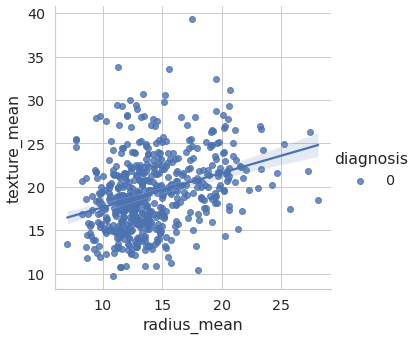

In [ ]:
sns.lmplot(x = 'radius_mean', y = 'texture_mean', hue = 'diagnosis', data = df)


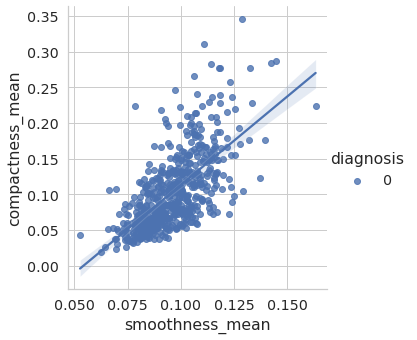

In [ ]:

sns.lmplot(x ='smoothness_mean', y = 'compactness_mean', 
           data = df, hue = 'diagnosis')

In [ ]:
sns.lmplot(x = 'radius_mean', y = 'texture_mean', hue = 'diagnosis', data = df)

NameError: ignored

# ML Model Generation

# **i.Logistic Regression model training, testing and metric analysis**

In [ ]:
#relevant imports
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

In [ ]:
#Building our model
lr = LogisticRegression(random_state = 1) 
#Training our model
lr.fit(x_train,y_train) 
print("Print accuracy of Logistic Regression Classifier: {}".format(lr.score(x_test,y_test)))
lr_acc_score = lr.score(x_test,y_test)

model accuracy is 0.97. 
Use confusion matrix to see which parts it got wrong in predicting.

**Logistic Regression model accuracy is 0.976**

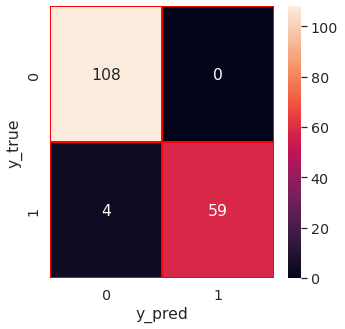

In [ ]:
y_pred = lr.predict(x_test)
y_true = y_test

cm = confusion_matrix(y_true, y_pred)

#visualize
f, ax = plt.subplots(figsize=(5,5))
sns.heatmap(cm,annot = True, linewidths=0.5,linecolor="red",fmt = ".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()

**Box Plots of Features**

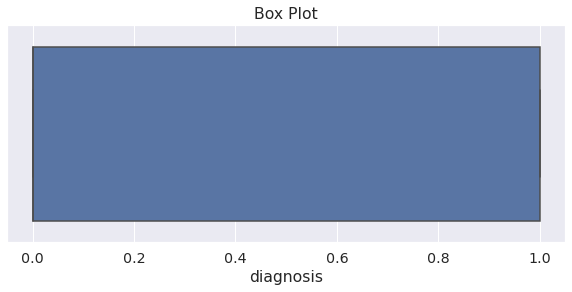

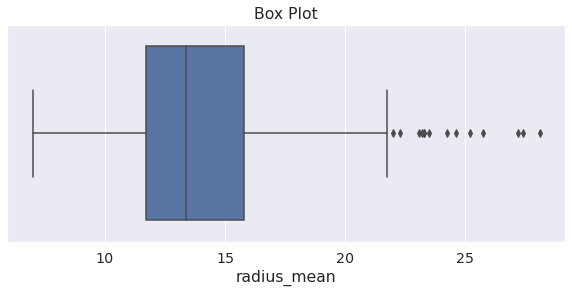

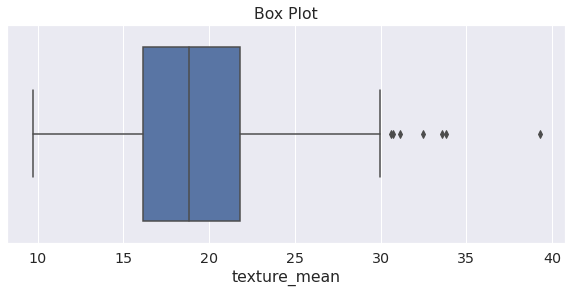

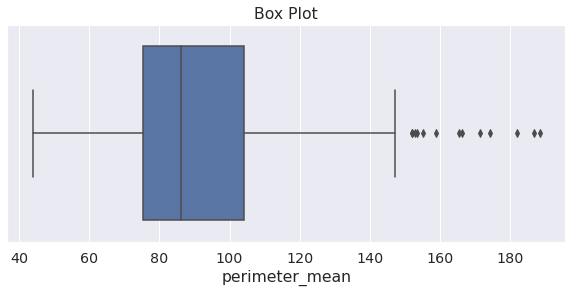

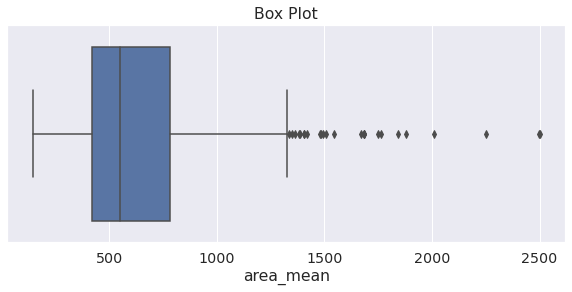

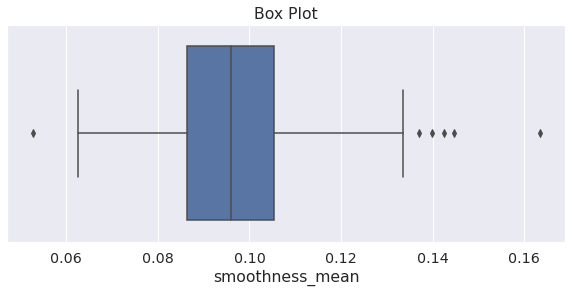

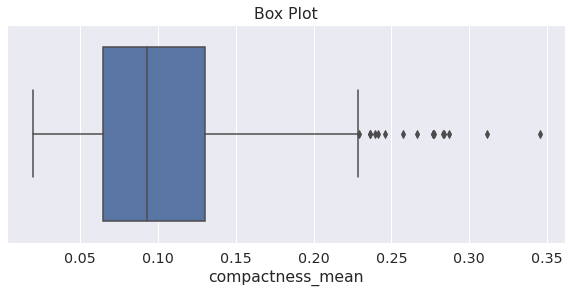

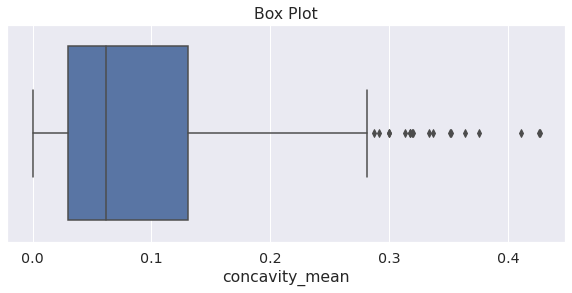

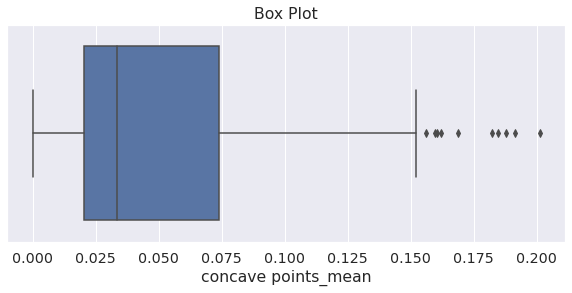

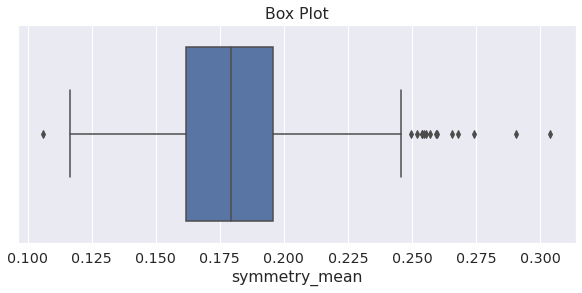

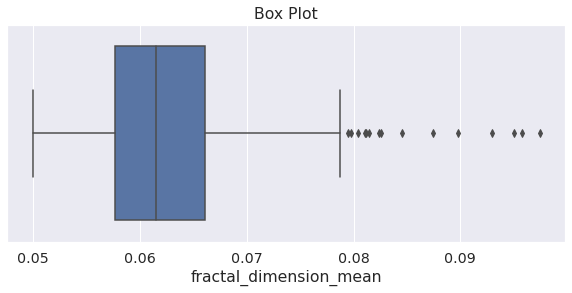

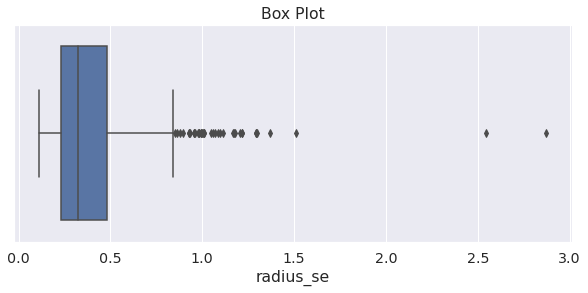

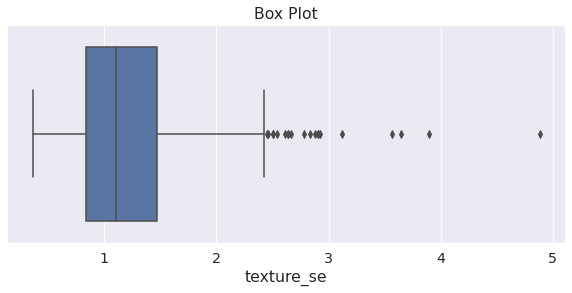

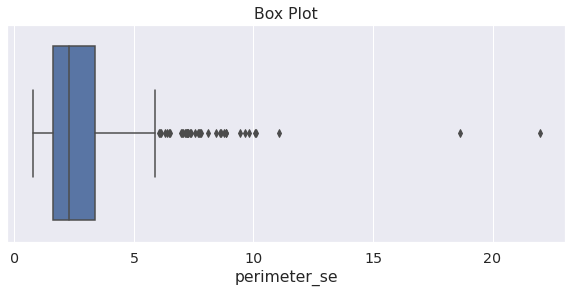

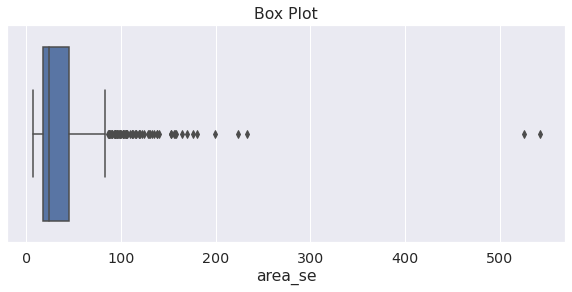

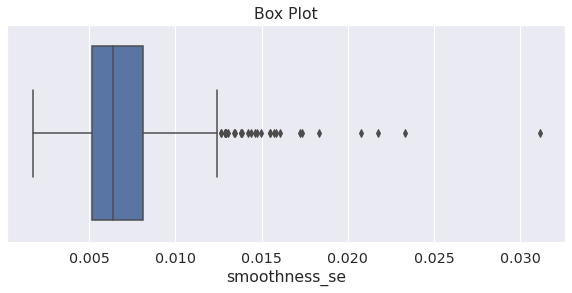

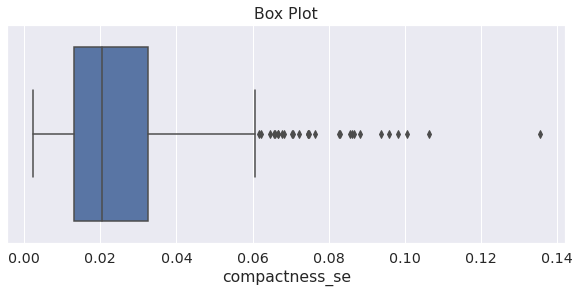

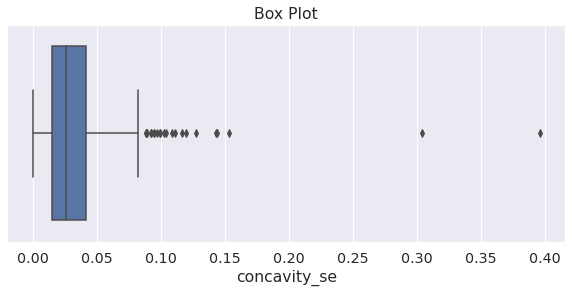

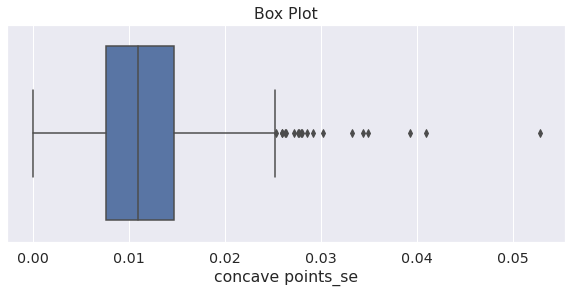

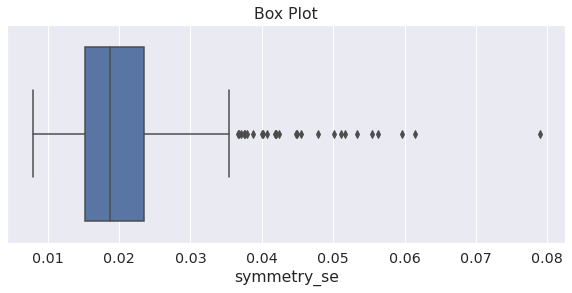

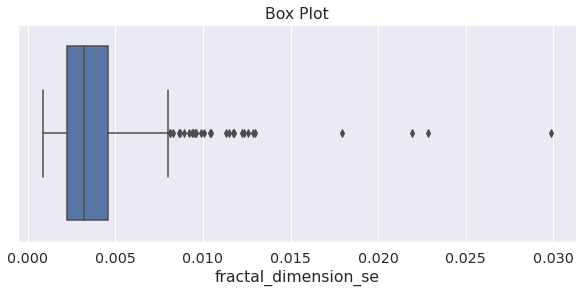

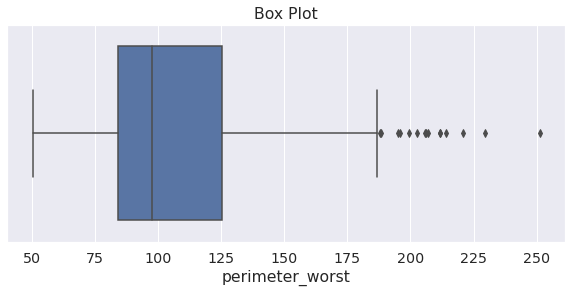

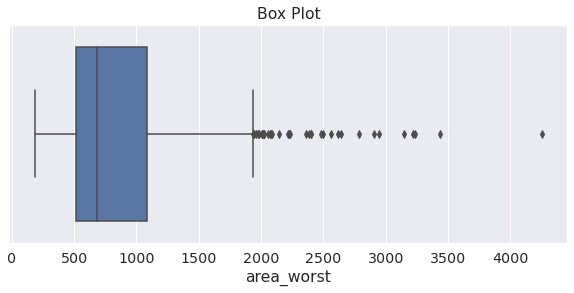

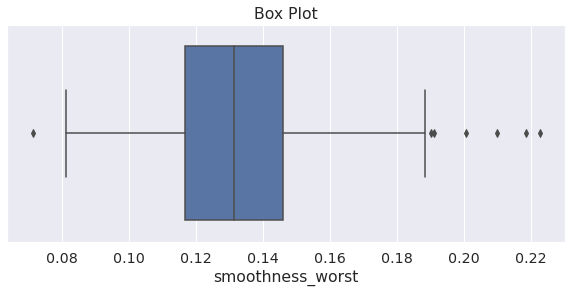

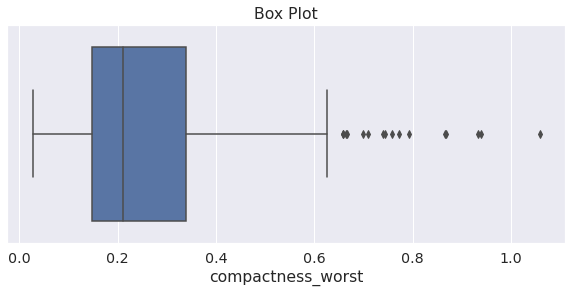

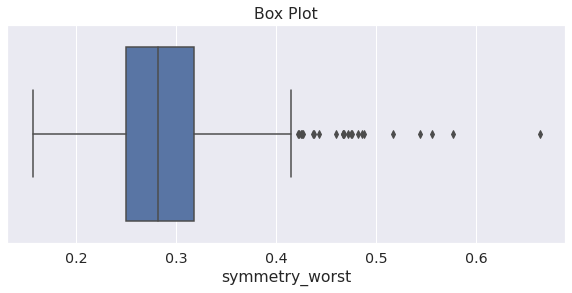

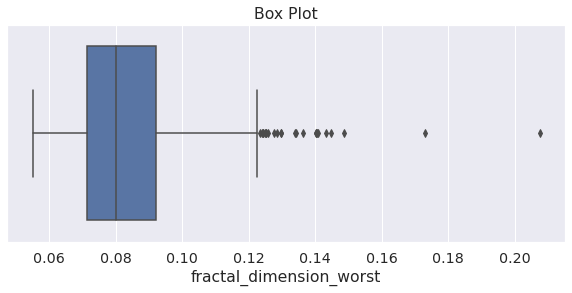

In [ ]:
def Box_plots(df):
    plt.figure(figsize=(10, 4))
    plt.title("Box Plot")
    sns.boxplot(df)
    plt.show()


for i in list(df.columns):
    Box_plots(df[i])

In [ ]:
#logistic regression for feature selection
y=df['diagnosis']
enc=LabelEncoder()
y=enc.fit_transform(y.values)
x=df.drop(columns='diagnosis').values
x_tr,x_ts,y_tr,y_ts=train_test_split(x,y, random_state=7, test_size=0.2,stratify=y)
sc=StandardScaler()
x_tr_sc=sc.fit_transform(x_tr)
x_ts_sc=sc.transform(x_ts)

In [ ]:
#LOGISTIC REGRESSION
lr=LogisticRegression(C=1.0, random_state=7)
lr.fit(x_tr_sc,y_tr)
y_pred=lr.predict(x_ts_sc)
print('coefs', lr.coef_)
print('accuracy', accuracy_score(y_ts,y_pred))

coefs [[ 0.55543336  1.0513401   0.51206973  0.58204193  0.01875879 -0.42972764
   1.19108253  1.21453344 -0.16772165 -0.51731185  1.03613544  0.1796946
   0.38068322  0.80735319  0.01697101 -0.83769329  0.09572449  0.57205715
  -0.34322008 -0.68826948  1.21381744  1.31498821  0.88302255  0.42421289
   1.03255476  0.90366378]]
accuracy 0.9649122807017544


In [ ]:
#train a model with only the best features

x=df[cols].values
x_tr,x_ts,y_tr,y_ts=train_test_split(x,y, random_state=7, test_size=0.2,stratify=y)
sc=StandardScaler()
x_tr_sc=sc.fit_transform(x_tr)
x_ts_sc=sc.transform(x_ts)


lr=LogisticRegression(C=10.0, random_state=7)
lr.fit(x_tr_sc,y_tr)
y_pred=lr.predict(x_ts_sc)
print('coefs', lr.coef_)
print('accuracy', accuracy_score(y_ts,y_pred))

from sklearn.metrics import confusion_matrix

plt.figure(figsize=(3,3))
sns.heatmap(confusion_matrix(y_ts,y_pred), annot=True, fmt='d');

NameError: ignored

**Logistic Regression accuracy 0.96**

**Visualizing the features selected by Logistic Regression**

In [ ]:
#make violin plots to visually evaluate features selected by lr
means=df.iloc[:,1:7]
ses=df.iloc[:,7:15]
worsts=df.iloc[:,15:]

means_sc=(means-means.mean())/(means.std())
ses_sc=(ses-ses.mean())/(ses.std())
worsts_sc=(worsts-worsts.mean())/(worsts.std())

means_sc=pd.concat([df['diagnosis'],means_sc],axis=1)
ses_sc=pd.concat([df['diagnosis'],ses_sc],axis=1)
worsts_sc=pd.concat([df['diagnosis'],worsts_sc],axis=1)

means_sc=pd.melt(means_sc, id_vars='diagnosis',
                 var_name='features',
                 value_name='value')
ses_sc=pd.melt(ses_sc, id_vars='diagnosis',
               var_name='features',
               value_name='value')
worsts_sc=pd.melt(worsts_sc, id_vars='diagnosis',
                  var_name='features',
                  value_name='value')

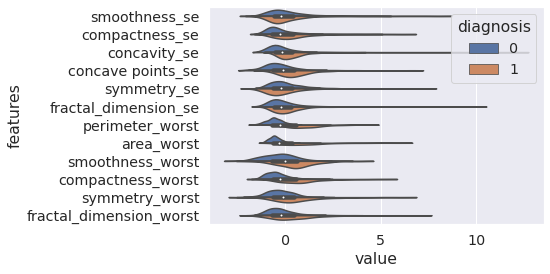

In [ ]:
sns.violinplot(y='features',x='value', hue='diagnosis', 
               data=worsts_sc, split=True);

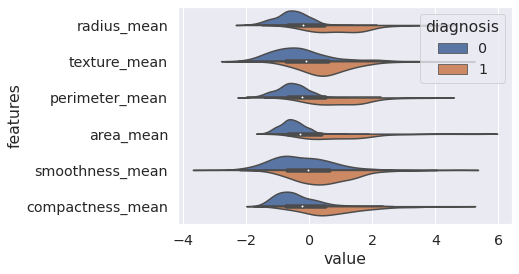

In [ ]:
sns.violinplot(y='features',x='value', hue='diagnosis',
               data=means_sc, split=True);

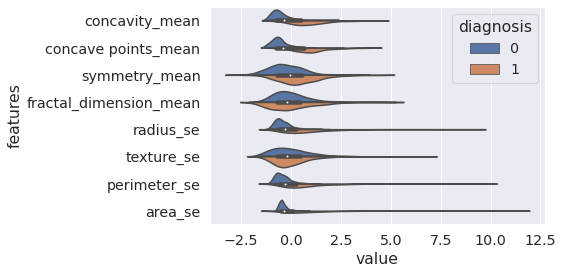

In [ ]:
sns.violinplot(y='features',x='value', hue='diagnosis',
               data=ses_sc, split=True);

The first few of the chosen features are the ones that, in the violinplots have distributions that separate more the two classes. The rest don't seem too significant. 

Logistic regressionproduced the significant features, towards determining the class.

Most significant features

In [ ]:
#which are the most significant features, and how much they contribute
coefs=lr.coef 
for ind in lr.coef_.argsort().reshape(18):
    print(df.columns[ind+1])
    print(coefs[ind])
    print('')

AttributeError: ignored

THE MOST SIGNIFICANT FEATURES: 
- fractal_dimension_mean
- compactness_se
- fractal_dimension_se
- symmetry_se
- symmetry_mean
- concavity_se
- smoothness_se
- texture_se
- smoothness_mean
- compactness_worst
- concave points_se
- smoothness_worst
- fractal_dimension_worst
- texture_mean
- symmetry_worst
- concavity_mean
- radius_se
- radius_mean


# **ii. Naive Bayes Model**

In [ ]:
#building our model
nb = GaussianNB()       
#training our model
nb.fit(x_train,y_train) 
print("Print accuracy of naive bayes algo: {}".format(nb.score(x_test,y_test)))
nb_acc_score = nb.score(x_test,y_test)

Print accuracy of naive bayes algo: 0.935672514619883


**Accuracy with Naive Bayes is 0.94**

confusion matrix to see which parts it got wrong in predicting

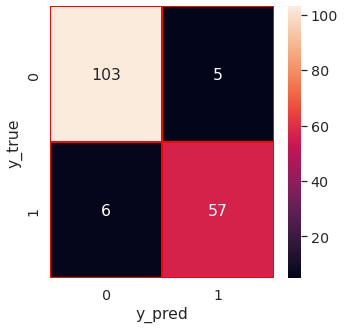

In [ ]:
y_pred = nb.predict(x_test)
y_true = y_test

cm = confusion_matrix(y_true, y_pred)

#visualize
f, ax = plt.subplots(figsize=(5,5))
sns.heatmap(cm,annot = True, linewidths=0.5,linecolor="red",fmt = ".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()

# **iii. SVM Model**

In [ ]:
import numpy as np
from sklearn.svm import SVC

In [ ]:
#building our model
svm = SVC()    
#training our model
svm.fit(x_train,y_train)       
print("Print accuracy of svm algo: ",svm.score(x_test,y_test))
svm_acc_score = svm.score(x_test,y_test)

Print accuracy of svm algo:  0.9824561403508771


**Accuracy of SVM is much higher at 0.9824561403508771**



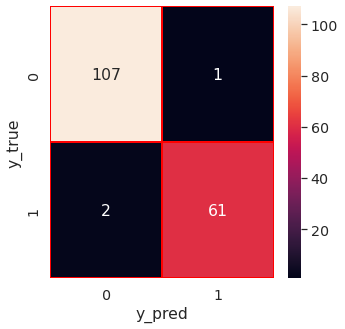

In [ ]:
#use confusion matrix to see which parts it got wrong in predicting.
y_pred = svm.predict(x_test)
y_true = y_test

cm = confusion_matrix(y_true, y_pred)

#visualize
f, ax = plt.subplots(figsize=(5,5))
sns.heatmap(cm,annot = True, linewidths=0.5,linecolor="red",fmt = ".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()

Accuracy 97%

# **iv. Decision Tree Classification Model**

In [ ]:
d_tree_1 = DecisionTreeClassifier(max_depth=4,random_state=0)
d_tree_1.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=4, random_state=0)

In [ ]:
print("Training Set Accuracy: {}".format(d_tree_1.score(x_train,y_train)))
print("Test Set Accuracy: {}".format(d_tree_1.score(x_test,y_test)))

Training Set Accuracy: 0.9949748743718593
Test Set Accuracy: 0.9473684210526315


**Decision Tree: Training set accuracy is 0.99 and test set accuracy is 0.947**

**Visualizing Decision Tree as a graph**

In [ ]:
from sklearn.tree import export_graphviz
export_graphviz(d_tree_1,out_file = 'tree.dot',class_names=["malignant","benign"],impurity=False,filled=True)

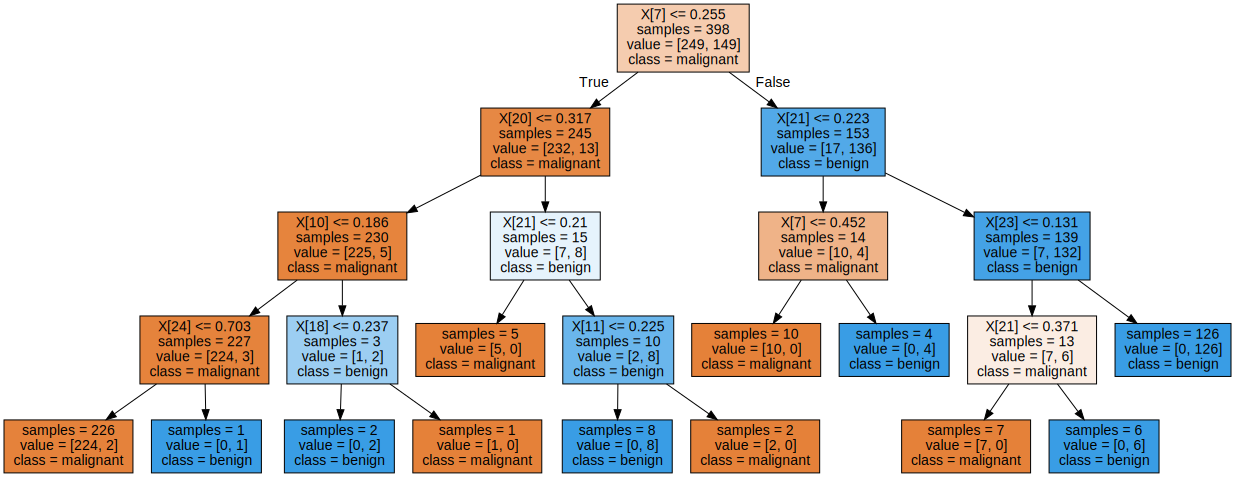

In [ ]:
import graphviz
with open ("tree.dot") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

In [ ]:
from sklearn.tree import DecisionTreeClassifier

#building our model
dt = DecisionTreeClassifier(random_state = 1)   
#training our model
dt.fit(x_train,y_train)      
print("Print accuracy of Decision Tree Classifier algo: ",dt.score(x_test,y_test))
dt_acc_score = dt.score(x_test,y_test)


Print accuracy of Decision Tree Classifier algo:  0.935672514619883


**Accuracy of Decision Tree Classifier algorithm is 0.935**

In [ ]:
# Predict for One Observation (image)
dt.predict(x_test.iloc[0].values.reshape(1, -1))


array([0])

***Predict for Multiple Observations (images) at Once***

In [ ]:

dt.predict(x_test[0:10])


array([0, 1, 1, 0, 0, 1, 1, 1, 0, 0])

**Graphical representation of the trained Decision Tree**
 



In [ ]:
from sklearn.tree import export_graphviz
import graphviz
from graphviz import Source

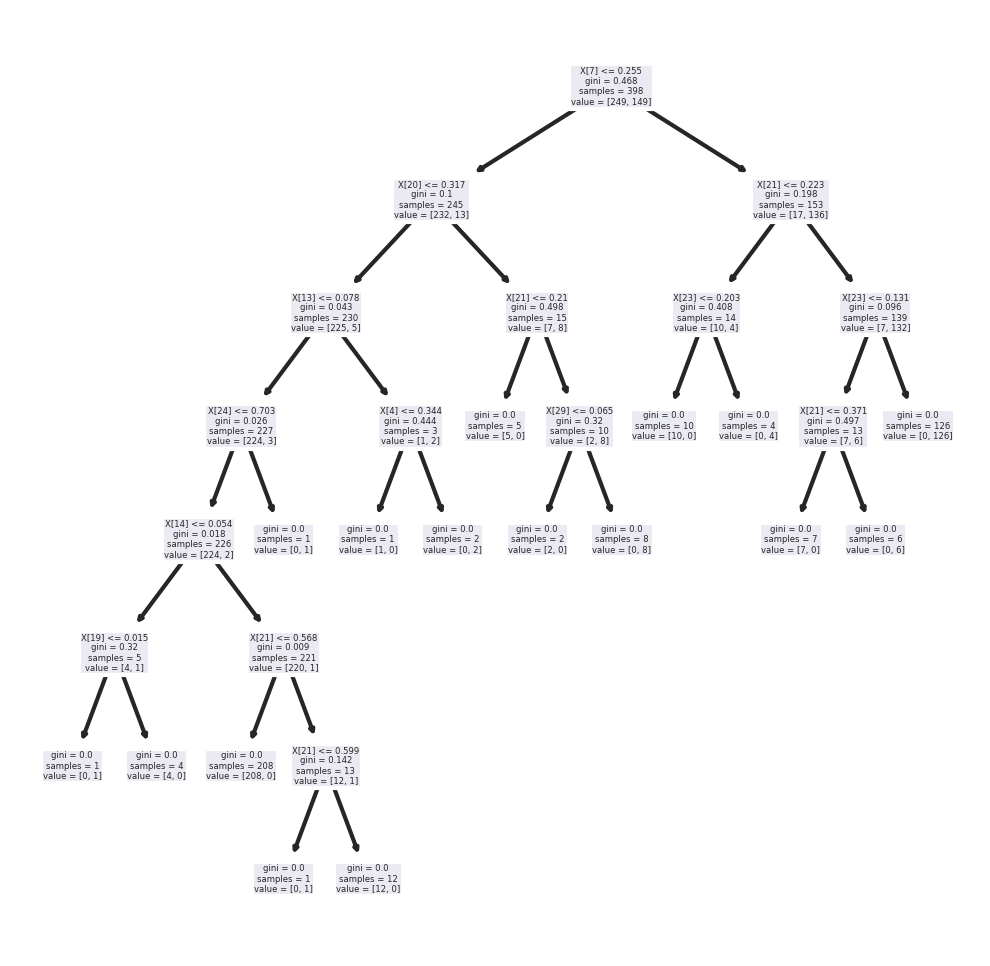

In [ ]:
from sklearn import tree
fig, axes = plt.subplots(nrows = 1, ncols = 1, figsize = (4,4), dpi = 300)

tree.plot_tree(dt);

# **v. Random Forest Model**

In [ ]:
rf = RandomForestClassifier(n_estimators=10,random_state=1)
rf.fit(x_train,y_train)
print("Print accuracy of Random Forest Classifier algo: ",rf.score(x_test,y_test))
rf_acc_score = rf.score(x_test,y_test)

Print accuracy of Random Forest Classifier algo:  0.9473684210526315


**Random Forest accuracy is 0.947**

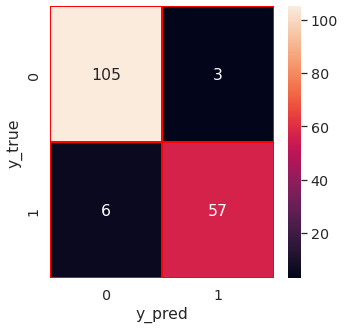

In [ ]:
#confusion matrix to see which parts it got wrong in predicting.
y_pred = rf.predict(x_test)
y_true = y_test

cm = confusion_matrix(y_true, y_pred)

#visualize
f, ax = plt.subplots(figsize=(5,5))
sns.heatmap(cm,annot = True, linewidths=0.5,linecolor="red",fmt = ".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

rfc=RandomForestClassifier()
rfc.fit(x_tr,y_tr)
y_pred=rfc.predict(x_ts)


print('\nAccuracy:\n', accuracy_score(y_ts,y_pred))
print('\nConfusion Matrix:\n', confusion_matrix(y_ts,y_pred))
print('\nClassification Report:\n', classification_report(y_ts,y_pred))


Accuracy:
 0.9122807017543859

Confusion Matrix:
 [[70  2]
 [ 8 34]]

Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.97      0.93        72
           1       0.94      0.81      0.87        42

    accuracy                           0.91       114
   macro avg       0.92      0.89      0.90       114
weighted avg       0.91      0.91      0.91       114



In [ ]:
plot_roc_curve(rf, y_true, y_pred)

ValueError: ignored

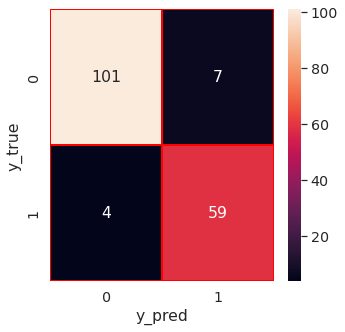

In [ ]:
#use confusion matrix to see which parts it got wrong in predicting.
y_pred = dt.predict(x_test)
y_true = y_test

cm = confusion_matrix(y_true, y_pred)

#visualize
f, ax = plt.subplots(figsize=(5,5))
sns.heatmap(cm,annot = True, linewidths=0.5,linecolor="red",fmt = ".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()

In [ ]:
df.diagnosis = [1 if each == "M" else 0 for each in df.diagnosis]
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,perimeter_worst,area_worst,smoothness_worst,compactness_worst,symmetry_worst,fractal_dimension_worst
0,0,17.990,10.380,122.800,1001.000,0.118,0.278,0.300,0.147,0.242,...,0.054,0.016,0.030,0.006,184.600,2019.000,0.162,0.666,0.460,0.119
1,0,20.570,17.770,132.900,1326.000,0.085,0.079,0.087,0.070,0.181,...,0.019,0.013,0.014,0.004,158.800,1956.000,0.124,0.187,0.275,0.089
2,0,19.690,21.250,130.000,1203.000,0.110,0.160,0.197,0.128,0.207,...,0.038,0.021,0.022,0.005,152.500,1709.000,0.144,0.424,0.361,0.088
3,0,11.420,20.380,77.580,386.100,0.142,0.284,0.241,0.105,0.260,...,0.057,0.019,0.060,0.009,98.870,567.700,0.210,0.866,0.664,0.173
4,0,20.290,14.340,135.100,1297.000,0.100,0.133,0.198,0.104,0.181,...,0.057,0.019,0.018,0.005,152.200,1575.000,0.137,0.205,0.236,0.077


* @pedram we should do hyperparameter tuning here*
to improve the performance of different classifiers,
eg. from another study
"we have evaluated numerous values
of ’n’ estimators, i.e., 50, 100, 500, 1000, 1500, and 2000 for Random Forest
Classifier, and achieved better accuracy for the value of ’n’ estimator as 500,
and employed entropy instead of gini criterion. Further, we ran with several
choices of ’k’ for our KNN model and achieved better accuracy at k = 9. For
the extra tree classifier, we investigate the numerous values of ’n’ estimators,
i.e., 50, 100, 500, 1000, 1500, and 2000, and achieve better accuracy for the
value of ’n’ estimator as 500."

# TPOT PIPELINE

In [ ]:
!pip install tpot

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 87 kB 2.8 MB/s 
     |████████████████████████████████| 139 kB 23.6 MB/s 
     |████████████████████████████████| 193.6 MB 55 kB/s 
  Created wheel for stopit: filename=stopit-1.1.2-py3-none-any.whl size=11953 sha256=3021421ba6bb89f86842e92deec496aa6d041e96bd57010a04086fc3667cfc5c
  Stored in directory: /root/.cache/pip/wheels/a8/bb/8f/6b9328d23c2dcedbfeb8498b9f650d55d463089e3b8fc0bfb2
Successfully built stopit
  Attempting uninstall: xgboost
    Found existing installation: xgboost 0.90
    Uninstalling xgboost-0.90:
      Successfully uninstalled xgboost-0.90


In [ ]:
%%time
from tpot import TPOTClassifier
tpot = TPOTClassifier(generations=10, 
                      population_size=16,
                      scoring=None, 
                      verbosity=2,
                      random_state=42)
tpot.fit(x_tr, y_tr)
print(f"Tpop score on test data: {tpot.score(x_ts, y_ts):.2f}")
tpot.export('tpot_electronics_pipeline.py')

Optimization Progress:   0%|          | 0/176 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: 0.9626373626373625

Generation 2 - Current best internal CV score: 0.9626373626373625

Generation 3 - Current best internal CV score: 0.9736263736263737

Generation 4 - Current best internal CV score: 0.9736263736263737

Generation 5 - Current best internal CV score: 0.9736263736263737

Generation 6 - Current best internal CV score: 0.9736263736263737

Generation 7 - Current best internal CV score: 0.9736263736263737

Generation 8 - Current best internal CV score: 0.9736263736263737

Generation 9 - Current best internal CV score: 0.9736263736263737

Generation 10 - Current best internal CV score: 0.9736263736263737

Best pipeline: ExtraTreesClassifier(GradientBoostingClassifier(input_matrix, learning_rate=1.0, max_depth=1, max_features=0.6000000000000001, min_samples_leaf=19, min_samples_split=19, n_estimators=100, subsample=0.7000000000000001), bootstrap=False, criterion=entropy, max_features=0.8, min_samples_leaf=14, min_samples_split=4

In [ ]:
!cat tpot_electronics_pipeline.py  

import numpy as np
import pandas as pd
from sklearn.ensemble import ExtraTreesClassifier, GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline, make_union
from tpot.builtins import StackingEstimator
from tpot.export_utils import set_param_recursive

# NOTE: Make sure that the outcome column is labeled 'target' in the data file
tpot_data = pd.read_csv('PATH/TO/DATA/FILE', sep='COLUMN_SEPARATOR', dtype=np.float64)
features = tpot_data.drop('target', axis=1)
training_features, testing_features, training_target, testing_target = \
            train_test_split(features, tpot_data['target'], random_state=42)

# Average CV score on the training set was: 0.9736263736263737
exported_pipeline = make_pipeline(
    StackingEstimator(estimator=GradientBoostingClassifier(learning_rate=1.0, max_depth=1, max_features=0.6000000000000001, min_samples_leaf=19, min_samples_split=19, n_estimators=100, subsample=0.7000000000000001)),
    

# **xAI**

**LIME Explainability Model**

In [ ]:
#imports
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import f1_score



In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.3,random_state=42)

In [ ]:
y.shape


(569,)

In [ ]:
X.shape


(569, 26)

In [ ]:

X = np.array(df.iloc[:, 1:])
y = np.array(df['diagnosis'])

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
	X, y, test_size = 0.33, random_state = 42)


In [ ]:
knn = KNeighborsClassifier(n_neighbors = 13)
knn.fit(X_train, y_train)


KNeighborsClassifier(n_neighbors=13)

In [ ]:

knn.score(X_test, y_test)

1.0

cross valdiation

In [ ]:
neighbors = []
cv_scores = []
  
from sklearn.model_selection import cross_val_score
# perform 10 fold cross validation
for k in range(1, 51, 2):
    neighbors.append(k)
    knn = KNeighborsClassifier(n_neighbors = k)
    scores = cross_val_score(
        knn, X_train, y_train, cv = 10, scoring = 'accuracy')
    cv_scores.append(scores.mean())

The optimal number of neighbors is  1 


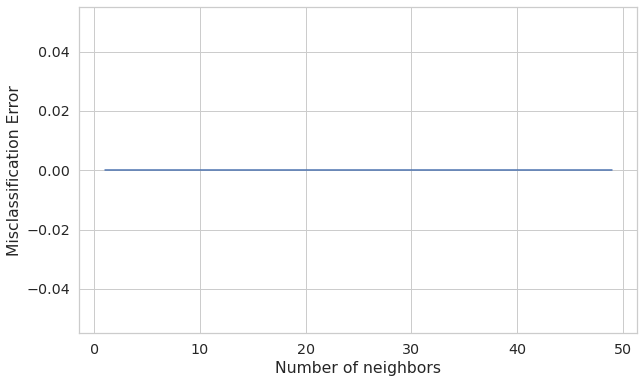

In [ ]:

MSE = [1-x for x in cv_scores]
  
# determining the best k
optimal_k = neighbors[MSE.index(min(MSE))]
print('The optimal number of neighbors is % d ' % optimal_k)
  
# plot misclassification error versus k
plt.figure(figsize = (10, 6))
plt.plot(neighbors, MSE)
plt.xlabel('Number of neighbors')
plt.ylabel('Misclassification Error')
plt.show()

In [ ]:
# Shapley

shap =  

XGBOOST

# DISCUSSION

**PERFORMANCE METRICS**

**ANSWERS TO RESEARCH QUESTIONS**

> Can we use deep learning to detect malignancies with the same or higher accuracy and confidence as existing models?

- SVM, ANN, random forest and decision tree are efficiently working on image datasets and can be an alternative for CNN (Jackhar et al., 2022)

> What are bias and errors in our model, and what are solutions to these?

# CONCLUSIONS

This notebook yielded....

The WBC yieled....

Compared to other studies....


We conclude that the best ....

# QUESTIONS

Does increasing a training data set size and any other factors in dataset/annotations improve explainability in this case? 

Effects of hyperparameter tuning?

# REFERENCES

- Aubreville, M., Bertram, C.A., Donovan, T.A. et al. A completely annotated whole slide image dataset of canine breast cancer to aid human breast cancer research. Sci Data 7, 417 (2020). https://doi.org/10.1038/s41597-020-00756-z

- Breast Cancer Histopathological Database (BreakHis) (2022). Laboratório Visão Robótica e Imagem. https://web.inf.ufpr.br/vri/databases/breast-cancer-histopathological-database-breakhis/ 

- Breast Cancer Wisconsin (Diagnostic) Data Set. (2022). UCI ML Repository https://archive.ics.uci.edu/ml/datasets/breast+cancer+wisconsin+(diagnostic)

- Jakhar AK, Gupta A, Singh M. (2022). SELF: A Stacked-based Ensemble Learning
Framework for Breast Cancer Classication. https://assets.researchsquare.com/files/rs-2013877/v2_covered.pdf?c=1667795805

- Kaplun D, Krasichkov A, Chetyrbok P, Oleinikov N, Garg A, Pannu HS. (2021).Cancer Cell Profiling Using Image Moments and Neural Networks with Model Agnostic Explainability: A Case Study of Breast Cancer Histopathological (BreakHis) Database. Mathematics. 2021; 9(20):2616. https://doi.org/10.3390/math9202616

- Lamy JB, Sekar B, Guezennec G, Bouaud J, Séroussi B (2019).
Explainable artificial intelligence for breast cancer: A visual case-based reasoning approach, Artificial Intelligence in Medicine,
Volume 94, 2019, Pages 42-53, ISSN 0933-3657,
https://doi.org/10.1016/j.artmed.2019.01.001.(https://www.sciencedirect.com/science/article/pii/S0933365718304846)

- Patrício C, Neves JC, Teixeira LF. (2022). Explainable Deep Learning Methods in Medical Imaging Diagnosis:
A Survey. 1, 1 (June 2022), 36 pages. https://doi.org/10.1145/nnnnnnn.nnnnnnn

- Rashmi R, Prasad K, Udupa CBK. (2021). Breast histopathological image analysis using image processing techniques for diagnostic puposes: A methodological review. J Med Syst. 2021 Dec 3;46(1):7. doi: 10.1007/s10916-021-01786-9. PMID: 34860316; PMCID: PMC8642363.

- Salod Z, Singh Y.(2020). A five-year (2015 to 2019) analysis of studies focused on breast cancer prediction using machine learning: A systematic review and bibliometric analysis. J Public Health Res. 2020 Jun 26;9(1):1792. doi: 10.4081/jphr.2020.1772. PMID: 32642458; PMCID: PMC7330506.

- Spanhol, F., Oliveira, L. S., Petitjean, C., and Heutte, L. (2016). Breast Cancer Histopathological Image Classification using Convolutional Neural Network, International Joint Conference on Neural Networks (IJCNN 2016), Vancouver, Canada, 2016.

- Spanhol, F., Cavalin, P.,  Oliveira, L. S., Petitjean, C., Heutte, L. (2017).Deep Features for Breast Cancer Histopathological Image Classification, 2017 IEEE International Conference on Systems, Man, and Cybernetics (IEEE SMC 2017), Banff, Canada, 2017

# THANK YOU FROM

**Dr. Shaista Hussain**
**&**
**Mr. Pedram Emami**  

> Fourthbrain MLE 10 Cohort 

🐪